In [25]:
from Overload import Overload
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [26]:
import timeit
overload = Overload()

# Vergleich der Anzahl der erfolgreichen Routen

The computed routes with edge disjoint paths in : 5525.657300007879 ms
The computed routes with one tree in : 5538.99589998764 ms
The computed routes with multiple trees in : 12815.832000007504 ms
The computed routes with multiple trees are : [[1, True, [105, 0, 12]], [1, True, [29, 12]], [2, True, [109, 8, 12]], [3, True, [9, 7, 12]], [1, True, [125, 0, 12]], [1, True, [47, 12]]]
The computed routes with multiple trees are : [[71, True, [105, 146, 149, 148, 147, 12]], [78, True, [29, 12]], [64, True, [109, 149, 141, 145, 147, 12]], [78, True, [9, 146, 131, 12]], [78, True, [125, 148, 138, 12]], [73, True, [47, 12]]]
The computed routes with multiple trees are : [[1, True, [105, 0, 12]], [1, True, [29, 12]], [1, True, [109, 8, 12]], [1, True, [9, 3, 149, 146, 138, 12]], [1, True, [125, 148, 149, 136, 124, 119, 12]], [1, True, [47, 12]]]
Success rate with edge disjoint paths is : 100.0 and the average length of the edge disjoint paths is 2.6666666666666665
Success rate with one tree is 

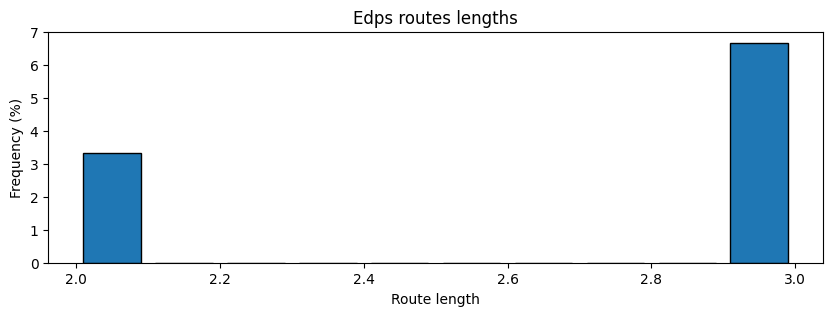

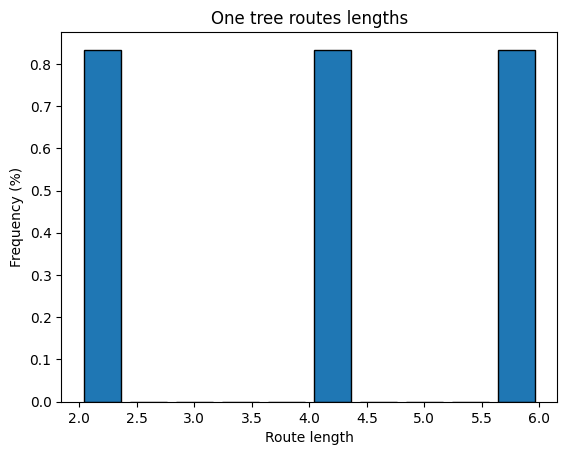

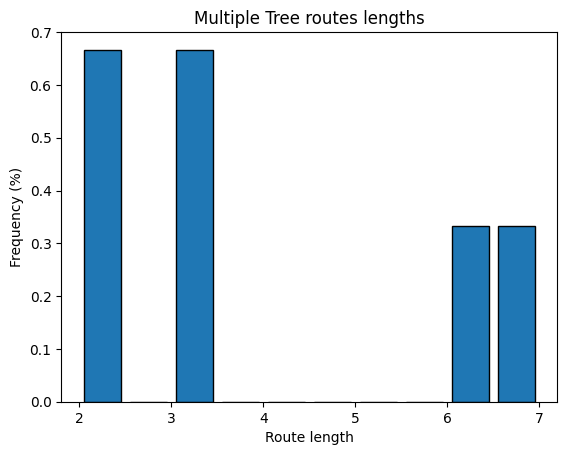

<Figure size 640x480 with 0 Axes>

In [65]:
def avg_length_success_rate(self, paths):
    
        total_count = 0
        succ_count = 0
        path_length = 0
    
        for path in paths:
        
            if path[1] is True:
                succ_count += 1
                if path[2] is not None:
                    path_length += len(path[2])
            total_count +=1
        
        avg_path_length = path_length / succ_count if succ_count > 0 else 0
        success_rate = succ_count / total_count * 100
    
        return success_rate, avg_path_length
    
def plot_lengths_results(self, paths, title):
    
        paths_successed = [path for path in paths if path[1] and path[2]]
        lengths = [len(path[2]) for path in paths_successed]
    
        plt.hist(lengths, bins=10, edgecolor='black', rwidth=0.9)
        plt.xlabel('Route length')
        plt.ylabel('Frequency (%)')
        plt.title(title)
        plt.show()
    
graph = nx.erdos_renyi_graph(150, 0.5)

sources, destination = overload.sources_destination_random(graph)

failed_edges = overload.generate_random_failed_edges(graph, 0.1)

# Compute the runtime in graph with 150 nodes and connection probability of 0.5 and failure rate 0.1
time_edps = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="edps"), number=1) * 1000
time_one_tree = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="onetree"), number=1) * 1000
time_multiple_tree = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="multitree"), number=1) * 1000

print(f'The computed routes with edge disjoint paths in : {time_edps} ms')
print(f'The computed routes with one tree in : {time_one_tree} ms')
print(f'The computed routes with multiple trees in : {time_multiple_tree} ms')

edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with multiple trees are : {edps}')
print(f'The computed routes with multiple trees are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

print(f'Success rate with edge disjoint paths is : {success_rate_edps} and the average length of the edge disjoint paths is {avg_path_length_edps}')
print(f'Success rate with one tree is : {success_rate_one} and the average length of the edge disjoint paths is {avg_path_length_one}')
print(f'Success rate with edge disjoint paths is : {success_rate_multi} and the average length of the edge disjoint paths is {avg_path_length_multi}')

plt.figure(figsize=(10,3))
overload.plot_lengths_results(edps, 'Edps routes lengths')
plt.savefig('Edps_routes_lengths.svg')
plt.savefig('Edps_routes_lengths.png')

overload.plot_lengths_results(onetree, 'One tree routes lengths')
plt.savefig('One_tree_routes_lengths.svg')
plt.savefig('One_tree_routes_lengths.png')

overload.plot_lengths_results(multitree, 'Multiple Tree routes lengths')
plt.savefig('Multiple_Tree_routes_lengths.svg')
plt.savefig('Multiple_Tree_routes_lengths.png')

# # Compute the runtime in graph with 150 nodes and connection probability of 0.6 and failure rate 0.3 and comparison of success rate and path lengths

Sources nodes are : [74, 117, 65, 83, 52, 127] and the destination node is : 101
The computed routes with edge disjoint paths in : 3080.91429999331 ms
The computed routes with one tree in : 3941.6690000070957 ms
The computed routes with multiple trees in : 18352.645600010874 ms
The computed routes with edge disjoint paths are : [[1, True, [74, 0, 101]], [1, True, [117, 101]], [1, True, [65, 0, 101]], [1, True, [83, 0, 101]], [1, True, [52, 101]], [3, True, [127, 3, 101]]]
The computed routes with one tree are : [[73, True, [74, 149, 147, 129, 148, 101]], [73, True, [117, 101]], [73, True, [65, 144, 149, 147, 134, 101]], [73, True, [83, 147, 136, 101]], [73, True, [52, 101]], [73, True, [127, 101]]]
The computed routes with multiple trees are : [[1, True, [74, 149, 144, 136, 101]], [1, True, [117, 101]], [1, True, [65, 144, 149, 143, 145, 101]], [1, True, [83, 147, 146, 101]], [1, True, [52, 101]], [1, True, [127, 101]]]
Success rate with edge disjoint paths is : 100.0 and the average l

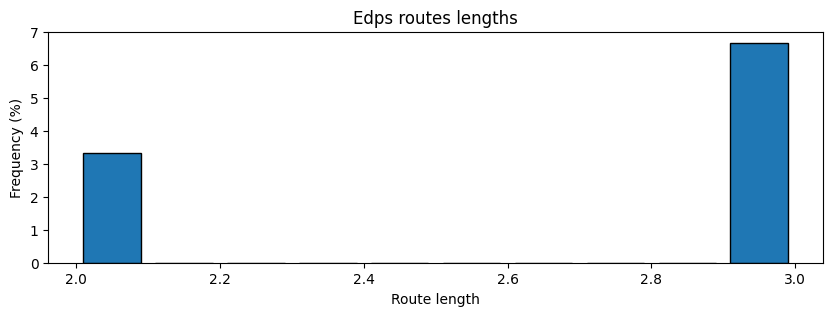

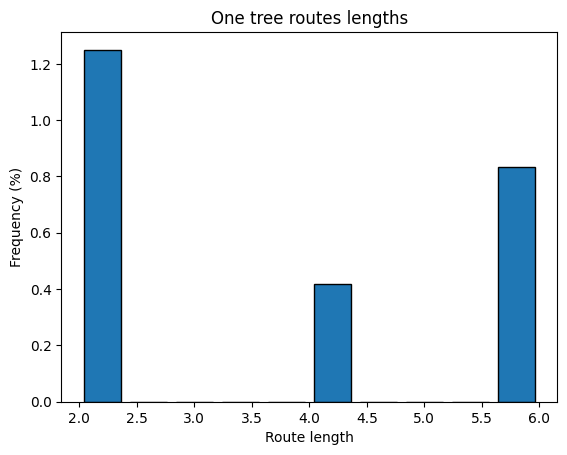

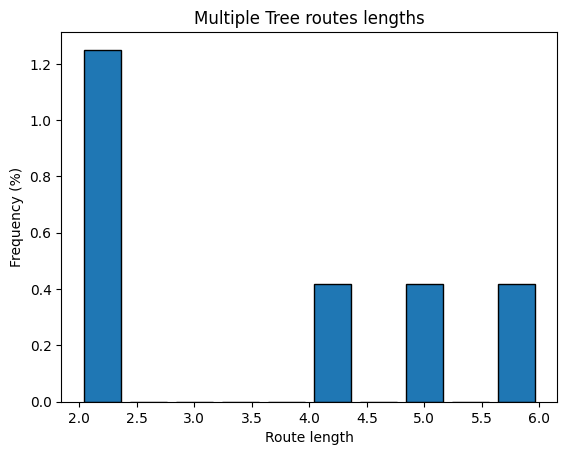

<Figure size 640x480 with 0 Axes>

In [27]:
graph = nx.erdos_renyi_graph(150, 0.6)

sources, destination = overload.sources_destination_random(graph)
print(f'Sources nodes are : {sources} and the destination node is : {destination}')

failed_edges = overload.generate_random_failed_edges(graph, 0.3)

# Compute the runtime in graph with 150 nodes and connection probability of 0.6 and failure rate 0.3
time_edps = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="edps"), number=1) * 1000
time_one_tree = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="onetree"), number=1) * 1000
time_multiple_tree = timeit.timeit(
    lambda: overload.compute_paths(graph, sources, destination, failed_edges, version="multitree"), number=1) * 1000

print(f'The computed routes with edge disjoint paths in : {time_edps} ms')
print(f'The computed routes with one tree in : {time_one_tree} ms')
print(f'The computed routes with multiple trees in : {time_multiple_tree} ms')

edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

print(f'Success rate with edge disjoint paths is : {success_rate_edps} and the average length of the edge disjoint paths is {avg_path_length_edps}')
print(f'Success rate with one tree is : {success_rate_one} and the average length of the edge disjoint paths is {avg_path_length_one}')
print(f'Success rate with edge disjoint paths is : {success_rate_multi} and the average length of the edge disjoint paths is {avg_path_length_multi}')

plt.figure(figsize=(10,3))
overload.plot_lengths_results(edps, 'Edps routes lengths')
plt.savefig('Edps_routes_lengths.svg')
plt.savefig('Edps_routes_lengths.png')

overload.plot_lengths_results(onetree, 'One tree routes lengths')
plt.savefig('One_tree_routes_lengths.svg')
plt.savefig('One_tree_routes_lengths.png')

overload.plot_lengths_results(multitree, 'Multiple Tree routes lengths')
plt.savefig('Multiple_Tree_routes_lengths.svg')
plt.savefig('Multiple_Tree_routes_lengths.png')

# Comparison of the average path length and the success rate routing methods

Sources nodes are : [9, 66, 119, 4, 62, 133] and the destination node is : 118
The computed routes with edge disjoint paths are : [[1, True, [9, 118]], [4, True, [66, 9, 118]], [1, True, [119, 118]], [1, True, [4, 1, 118]], [1, True, [62, 1, 118]], [1, True, [133, 1, 118]]]
The computed routes with one tree are : [[86, True, [9, 118]], [87, True, [66, 145, 142, 118]], [86, True, [119, 118]], [87, True, [4, 148, 139, 118]], [87, True, [62, 147, 128, 149, 118]], [85, True, [133, 148, 137, 142, 118]]]
The computed routes with multiple trees are : [[1, True, [9, 118]], [1, True, [66, 145, 148, 144, 118]], [1, True, [119, 118]], [1, True, [4, 148, 144, 118]], [1, True, [62, 147, 143, 118]], [1, True, [133, 1, 118]]]


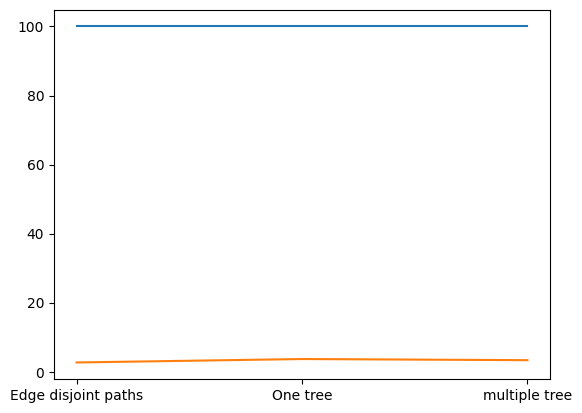

In [28]:
#random Graph
G = nx.erdos_renyi_graph(100, 0.5)

sources, destination = overload.sources_destination_random(graph)
failed_edges = overload.generate_random_failed_edges(graph, 0.3)

print(f'Sources nodes are : {sources} and the destination node is : {destination}')

edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

plt.figure()
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [success_rate_edps, success_rate_one, success_rate_multi])
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [avg_path_length_edps, avg_path_length_one, avg_path_length_multi])
plt.show()

# Comparison of the average path length and the success rate routing methods graph with 100 nodes and p 0.7 and failure rate 0.3

Sources nodes are : [83, 5, 32, 29, 26, 9] and the destination node is : 36
The computed routes with edge disjoint paths are : [[4, True, [83, 7, 36]], [1, True, [5, 3, 36]], [1, True, [32, 36]], [1, True, [29, 36]], [2, True, [26, 10, 36]], [2, True, [9, 10, 36]]]
The computed routes with one tree are : [[90, True, [83, 149, 119, 147, 135, 123, 55, 143, 36]], [90, True, [5, 139, 12, 36]], [90, True, [32, 36]], [90, True, [29, 36]], [90, True, [26, 149, 137, 147, 130, 148, 1, 2, 144, 36]], [90, True, [9, 148, 136, 146, 36]]]
The computed routes with multiple trees are : [[1, True, [83, 149, 140, 36]], [1, True, [5, 3, 36]], [1, True, [32, 36]], [1, True, [29, 36]], [1, True, [26, 149, 140, 36]], [1, True, [9, 148, 146, 36]]]


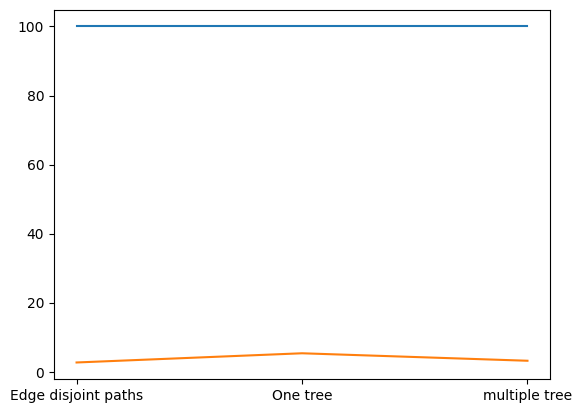

In [5]:
#random Graph
G = nx.erdos_renyi_graph(100, 0.7)

sources, destination = overload.sources_destination_random(graph)
failed_edges = overload.generate_random_failed_edges(graph, 0.3)

print(f'Sources nodes are : {sources} and the destination node is : {destination}')

edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

plt.figure()
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [success_rate_edps, success_rate_one, success_rate_multi])
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [avg_path_length_edps, avg_path_length_one, avg_path_length_multi])
plt.show()

# Comparison of the average path length and the success rate routing methods graph with 125 nodes and p 1 and failure rate 0.3

Sources nodes are : [102, 128, 109, 6, 50, 2] and the destination node is : 18
The computed routes with edge disjoint paths are : [[1, True, [102, 18]], [2, True, [128, 2, 18]], [4, True, [109, 13, 18]], [3, True, [6, 2, 18]], [4, True, [50, 4, 18]], [1, True, [2, 18]]]
The computed routes with one tree are : [[79, True, [102, 18]], [79, True, [128, 18]], [79, True, [109, 18]], [78, False, None], [79, True, [50, 18]], [79, True, [2, 18]]]
The computed routes with multiple trees are : [[1, True, [102, 18]], [1, True, [128, 18]], [1, True, [109, 18]], [1, True, [6, 2, 18]], [1, True, [50, 18]], [1, True, [2, 18]]]


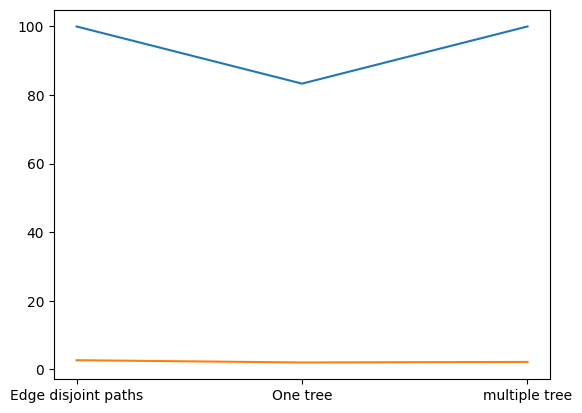

In [29]:
#random Graph
G = nx.erdos_renyi_graph(200, 1)

sources, destination = overload.sources_destination_random(graph)
failed_edges = overload.generate_random_failed_edges(graph, 0.3)

print(f'Sources nodes are : {sources} and the destination node is : {destination}')

edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

plt.figure()
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [success_rate_edps, success_rate_one, success_rate_multi])
plt.plot(['Edge disjoint paths','One tree', 'multiple tree'], [avg_path_length_edps, avg_path_length_one, avg_path_length_multi])
plt.show()

# Best routes for each method

Sources nodes are : [102, 128, 109, 6, 50, 2] and the destination node is : 18
The computed routes with edge disjoint paths are : [[1, True, [102, 18]], [2, True, [128, 2, 18]], [4, True, [109, 13, 18]], [3, True, [6, 2, 18]], [4, True, [50, 4, 18]], [1, True, [2, 18]]]
The computed routes with one tree are : [[79, True, [102, 18]], [79, True, [128, 18]], [79, True, [109, 18]], [78, False, None], [79, True, [50, 18]], [79, True, [2, 18]]]
The computed routes with multiple trees are : [[1, True, [102, 18]], [1, True, [128, 18]], [1, True, [109, 18]], [1, True, [6, 2, 18]], [1, True, [50, 18]], [1, True, [2, 18]]]


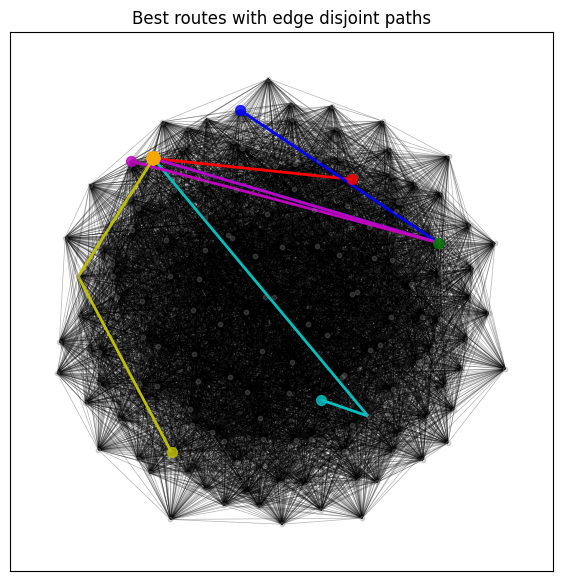

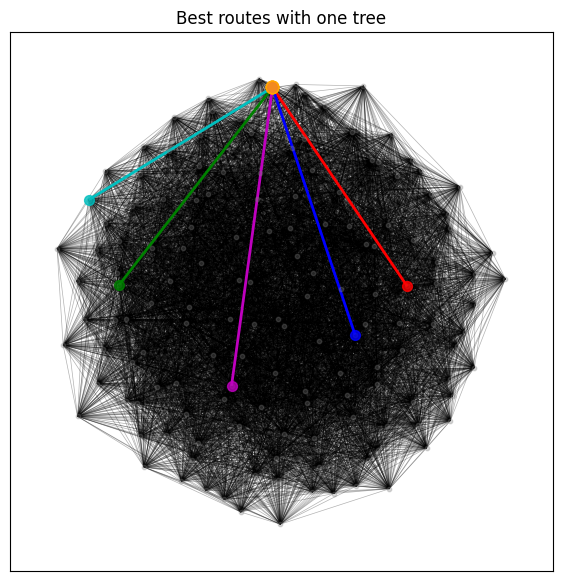

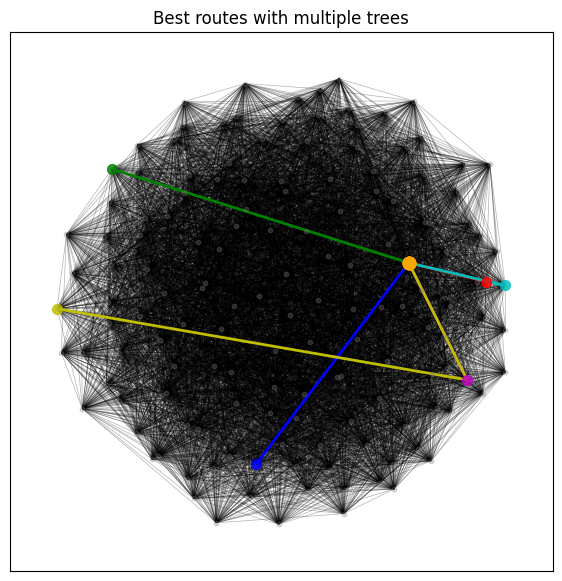

In [39]:
def plot_top_routes(graph, paths, title):
    
    success_paths = sorted([path for path in paths if path[1]], key=lambda x: len(x[2]))
    top_paths = success_paths
        
    figure, axis = plt.subplots(figsize=(7,7))
    position = nx.spring_layout(graph)
    
    nx.draw_networkx_nodes(graph, position, node_size=10, node_color='gray', alpha=0.3, ax=axis)
    nx.draw_networkx_edges(graph, position, width=0.5, alpha=0.3, ax=axis)
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, path in enumerate(top_paths):
        
        destination_node = path[2][-1]
        color = colors[i % len(colors)]
        path_edges = [(path[2][i], path[2][i+1]) for i in range(len(path[2])-1)]
        nx.draw_networkx_edges(graph, position, edgelist=path_edges, edge_color=color, width=2, ax=axis)
        nx.draw_networkx_nodes(graph, position, nodelist=[path[2][0], path[2][-1]], node_size=50, node_color=color, alpha=0.8, ax=axis)
        nx.draw_networkx_nodes(graph, position, nodelist=[destination_node], node_size=80, node_color='orange', alpha=0.8, ax=axis)
        
    plt.title(title)
    plt.show()
    
print(f'Sources nodes are : {sources} and the destination node is : {destination}')
    
edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

plot_top_routes(graph, edps, 'Best routes with edge disjoint paths')
plot_top_routes(graph, onetree, 'Best routes with one tree')
plot_top_routes(graph,multitree, 'Best routes with multiple trees')


Sources nodes are : [102, 128, 109, 6, 50, 2] and the destination node is : 18
The computed routes with edge disjoint paths are : [[1, True, [102, 18]], [2, True, [128, 2, 18]], [4, True, [109, 13, 18]], [3, True, [6, 2, 18]], [4, True, [50, 4, 18]], [1, True, [2, 18]]]
The computed routes with one tree are : [[79, True, [102, 18]], [79, True, [128, 18]], [79, True, [109, 18]], [78, False, None], [79, True, [50, 18]], [79, True, [2, 18]]]
The computed routes with multiple trees are : [[1, True, [102, 18]], [1, True, [128, 18]], [1, True, [109, 18]], [1, True, [6, 2, 18]], [1, True, [50, 18]], [1, True, [2, 18]]]


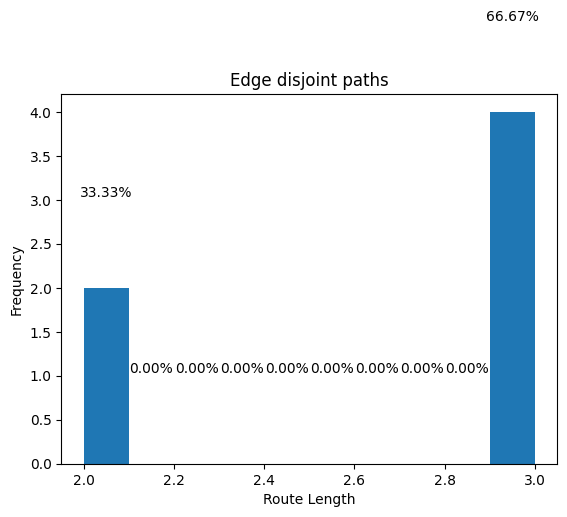

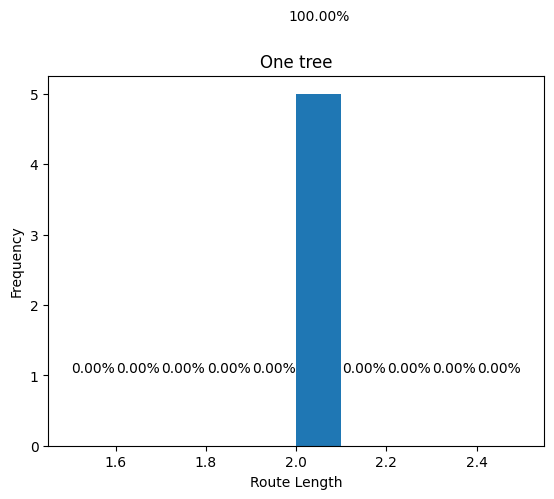

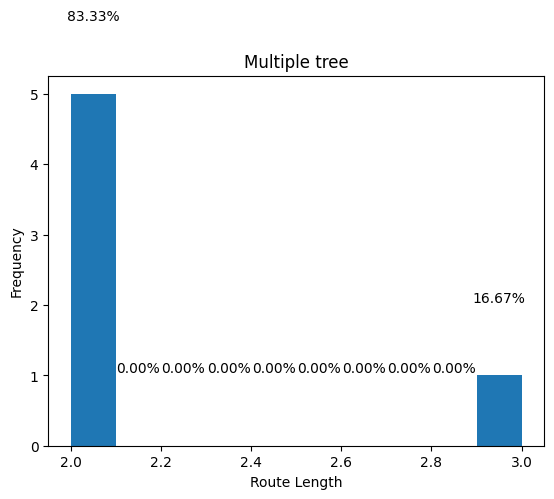

In [60]:
def route_lengths(paths, title):
    success_paths = [path for path in paths if path[1] and path[2]]
    lengths = [len(path[2]) for path in success_paths]
    bin_counts, _, _ = plt.hist(lengths, bins=10)
    total_success_paths = len(success_paths)
    for i, count in enumerate(bin_counts):
        x = plt.gca().patches[i].get_x() + plt.gca().patches[i].get_width() / 2
        y = plt.gca().patches[i].get_height() + 1
        percentage = count / total_success_paths * 100
        plt.text(x, y, f'{percentage:.2f}%', ha='center', va='bottom')
    plt.xlabel('Route Length')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

print(f'Sources nodes are : {sources} and the destination node is : {destination}')
    
edps = overload.compute_paths(graph, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(graph, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(graph, sources, destination, failed_edges, 'multitree')

print(f'The computed routes with edge disjoint paths are : {edps}')
print(f'The computed routes with one tree are : {onetree}')
print(f'The computed routes with multiple trees are : {multitree}')

route_lengths(edps, 'Edge disjoint paths')
route_lengths(onetree, 'One tree')
route_lengths(multitree, 'Multiple tree')

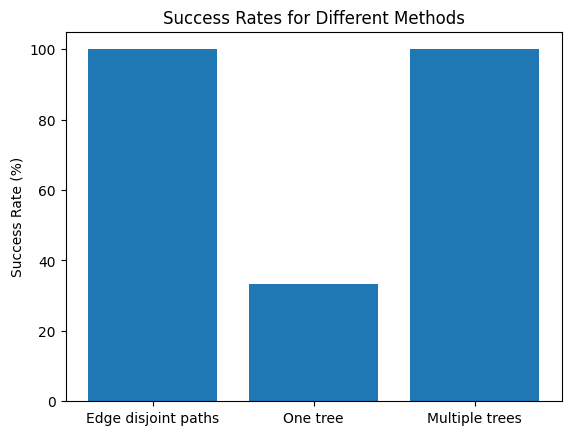

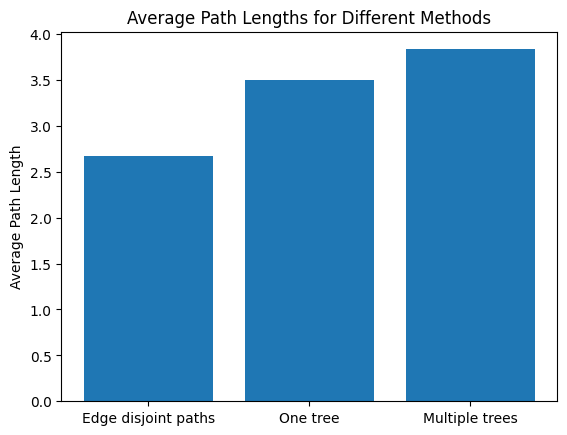

In [73]:
erdos = nx.erdos_renyi_graph(200, 0.7)

sources, destination = overload.sources_destination_random(erdos)
failed_edges = overload.generate_random_failed_edges(erdos, 0.7)

edps = overload.compute_paths(erdos, sources, destination, failed_edges, 'edps')
onetree = overload.compute_paths(erdos, sources, destination, failed_edges, 'onetree')
multitree = overload.compute_paths(erdos, sources, destination, failed_edges, 'multitree')

success_rate_edps, avg_path_length_edps = overload.avg_length_success_rate(edps)
success_rate_one, avg_path_length_one = overload.avg_length_success_rate(onetree)
success_rate_multi, avg_path_length_multi = overload.avg_length_success_rate(multitree)

success_rates = [success_rate_edps, success_rate_one, success_rate_multi]

labels = ['Edge disjoint paths', 'One tree', 'Multiple trees']
plt.bar(labels, success_rates)
plt.ylabel('Success Rate (%)')
plt.title('Success Rates for Different Methods')

avg_path_lengths = [avg_path_length_edps, avg_path_length_one, avg_path_length_multi]

plt.figure()
plt.bar(labels, avg_path_lengths)
plt.ylabel('Average Path Length')
plt.title('Average Path Lengths for Different Methods')

plt.show()

